In [ ]:
# This notebook was an experiment.
# I wanted to see if I could have a rudimentary machine learning algorithm that decided
#  what images had clouds and which didn't based on certain numerical values from the image.
# It didn't work brilliantly. 
# It was also very rudimentary because I'm still learning how machine learning (ha?) works.

In [11]:
import os
from pathlib import Path

p = Path(os.path.abspath(os.curdir))
parent = str(p.parent)

In [208]:
import numpy as np
from scipy import ndimage
import math

directory = parent + '/Images/20170623/'
center = (256, 252)
files = os.listdir(directory)

data = []

# A list of the li threshold values for each image.
f = open('li.txt', 'r')

li = []

for line in f:
    line = line[:-2]
    li.append(float(line))

names = []

# A list of the training data. It gets written from this notebook.
# The theory was that if this worked I could copy this training txt
# To the main file and have the python script use it.
f2 = open('training.txt', 'w')

i = 0
for file in files:
    img = ndimage.imread(directory + file, mode='L')
    tempimg = np.copy(img)#np.array(img[center[1] - 240: center[1] + 240, center[0] - 240: center[1] + 240], copy=True)
    
    tempmean = np.mean(tempimg)
    tempstd =  np.std(tempimg)
    tempvar = np.var(tempimg)
    tempmedian = np.median(tempimg)
    
    if 28 <= i <= 97:
        cat = 'Cloud'
    else:
        cat = 'No Cloud'
    
    templi = li[i]
    names.append(file)
    dic = {'Median' : tempmedian, 'Mean' : tempmean, 'Var' : tempvar,
                 'StDev' : tempstd, 'Li' : templi, 'Category' : cat}
    data.append(dic)
    
    f2.write(str(dic) + '\n')
    
    i += 1

In [209]:
print(names.index('r_ut051343s84000.png'))

28


In [210]:
import pandas as pd

clouds = pd.DataFrame(data)
print(clouds)

     Category          Li        Mean  Median       StDev           Var
0    No Cloud   32.830295  132.241676   225.0  125.160450  15665.138339
1    No Cloud   33.548007  136.249454   225.0  123.617934  15281.393564
2    No Cloud   37.024205  134.349480   187.0  121.586319  14783.232883
3    No Cloud   39.130435  128.754944   132.0  117.605285  13831.003012
4    No Cloud   41.580843  123.214062   108.0  110.948471  12309.563297
5    No Cloud   44.832348  115.130222    92.0  103.431749  10698.126707
6    No Cloud   62.699801  105.296112    91.0   95.758225   9169.637598
7    No Cloud   66.376272   95.130249    83.0   87.097770   7586.021480
8    No Cloud   71.391356   86.016991    83.0   78.309539   6132.383951
9    No Cloud   74.745004   79.675621    83.0   71.222879   5072.698459
10   No Cloud   75.258669   74.211506    75.0   64.929752   4215.872650
11   No Cloud   72.400619   70.862911    76.0   60.202885   3624.387361
12   No Cloud   68.103225   68.583660    76.0   57.343167   3288

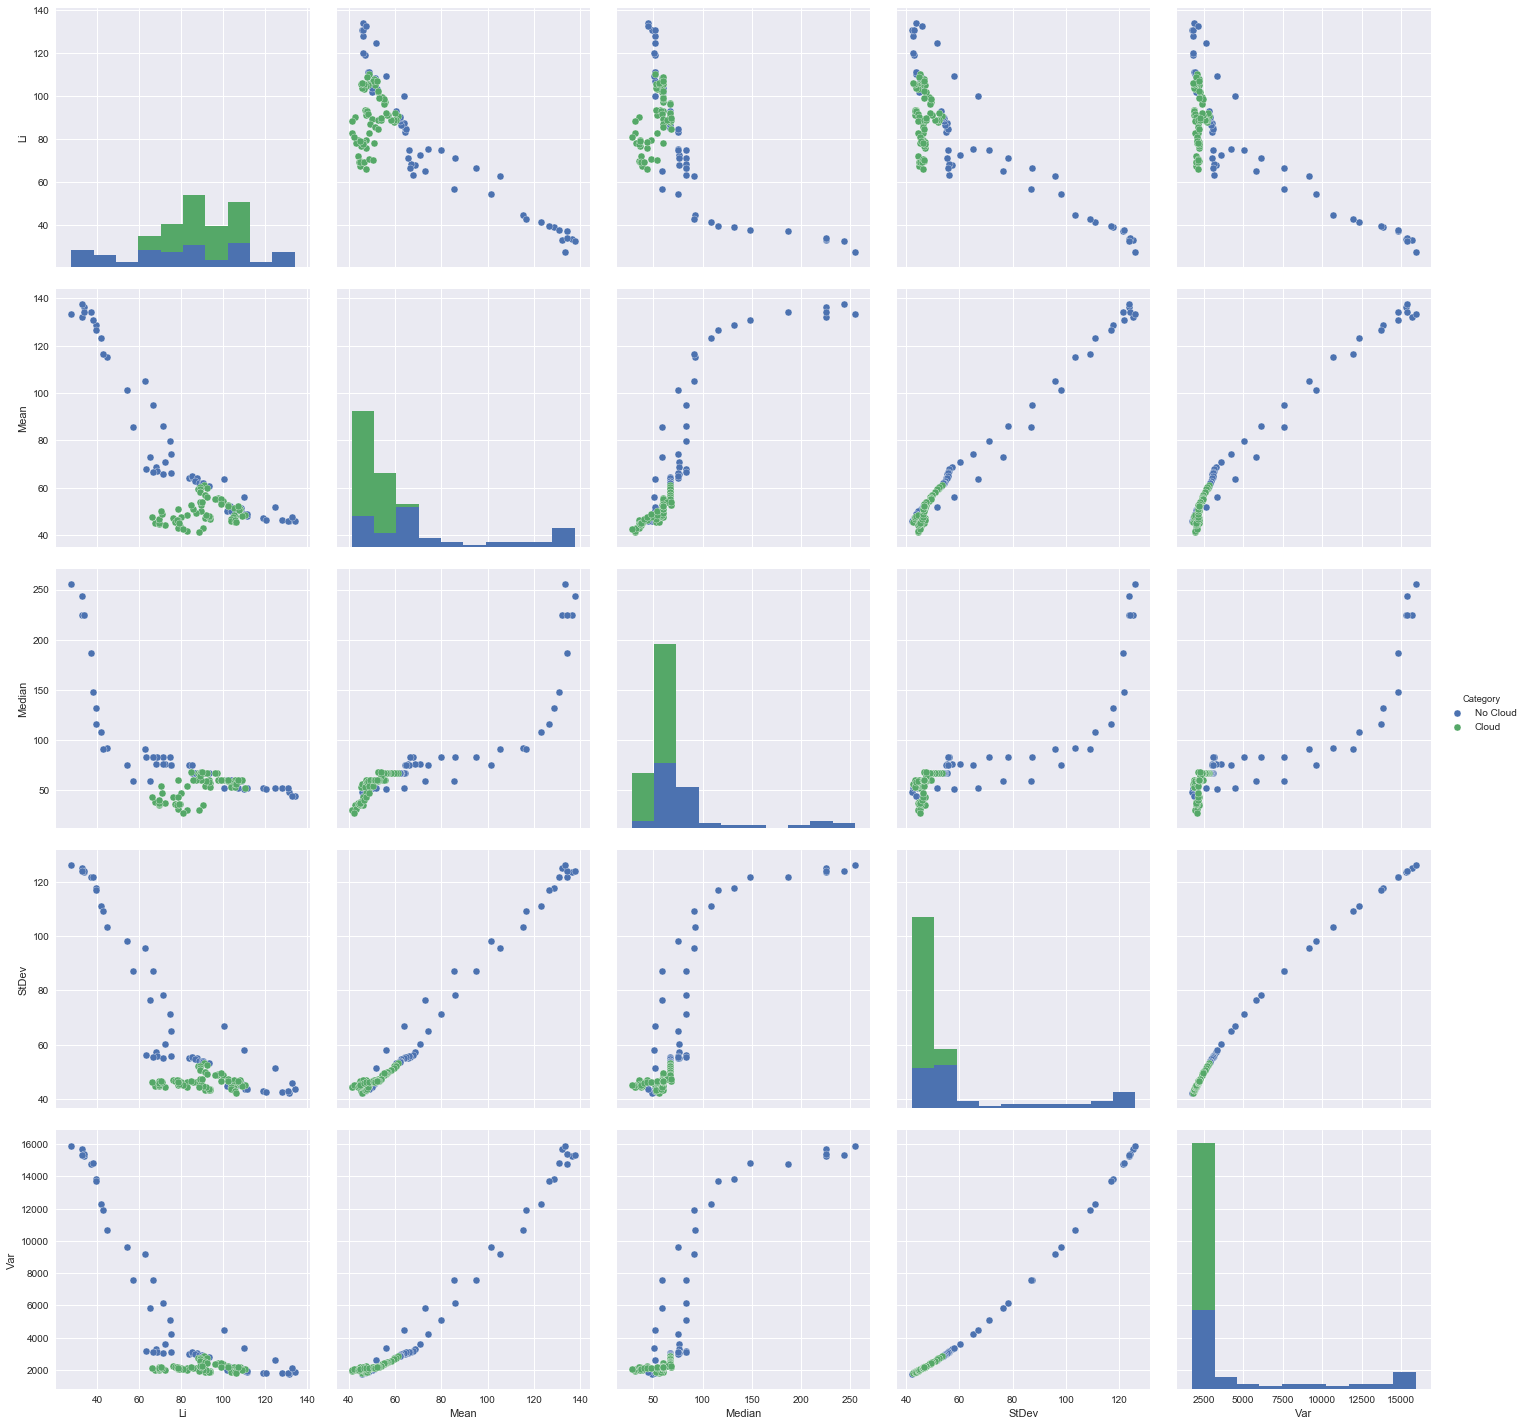

In [211]:
%matplotlib inline
import seaborn as sns; sns.set()
plot = sns.pairplot(clouds, hue='Category', size=4)
plot.savefig('pairs.png')

In [212]:
X = clouds.drop('Category', axis=1)

y = clouds['Category']

In [213]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [214]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [215]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.78125

In [216]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=10)
scores.mean()

0.79743589743589749

In [217]:
print(Xtest)

             Li        Mean  Median       StDev           Var
17    75.120970   66.154854    75.0   55.760177   3109.197334
109  120.293686   46.362442    51.0   42.518697   1807.839575
58    93.462526   47.680866    57.0   43.678421   1907.804476
57   105.974652   45.730824    56.0   42.368877   1795.121708
60    91.237833   47.318810    54.0   43.423002   1885.557105
8     71.391356   86.016991    83.0   78.309539   6132.383951
111  131.009789   45.761635    48.0   42.186181   1779.673887
59    93.104872   47.497475    56.0   43.560325   1897.501886
9     74.745004   79.675621    83.0   71.222879   5072.698459
77    80.776346   42.505974    28.0   45.212942   2044.210124
76    78.244031   43.079685    32.0   45.247167   2047.306162
98   103.339205   52.356945    60.0   46.448990   2157.508649
34    88.691905   58.354305    67.0   50.848156   2585.534941
84    69.468336   45.035744    37.0   45.142959   2037.886784
37    92.316429   56.023907    67.0   49.097646   2410.578870
38    97